In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [25]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [26]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 791 files belonging to 2 classes.


In [27]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [28]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 100 files belonging to 2 classes.


In [29]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
8/8 [==============================] - 119s 13s/step - loss: 5.2122 - accuracy: 0.4791 - val_loss: 0.6921 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - 100s 13s/step - loss: 0.6759 - accuracy: 0.5992 - val_loss: 0.8030 - val_accuracy: 0.5408
Epoch 3/10
8/8 [==============================] - 101s 13s/step - loss: 0.6548 - accuracy: 0.6131 - val_loss: 0.6480 - val_accuracy: 0.7347
Epoch 4/10
8/8 [==============================] - 102s 13s/step - loss: 0.6122 - accuracy: 0.7307 - val_loss: 0.5765 - val_accuracy: 0.6429
Epoch 5/10
8/8 [==============================] - 102s 13s/step - loss: 0.5750 - accuracy: 0.7029 - val_loss: 0.7894 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 106s 13s/step - loss: 0.5153 - accuracy: 0.7472 - val_loss: 0.5068 - val_accuracy: 0.7857
Epoch 7/10
8/8 [==============================] - 99s 12s/step - loss: 0.4690 - accuracy: 0.7674 - val_loss: 0.4009 - val_accuracy: 0.8163
Epoch 8/10
8/8 [=====

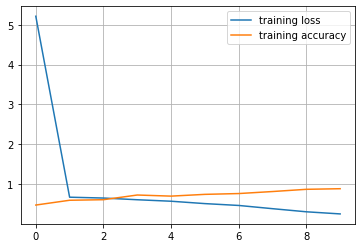

In [31]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

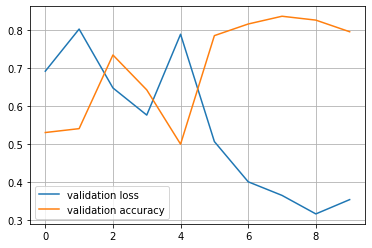

In [32]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

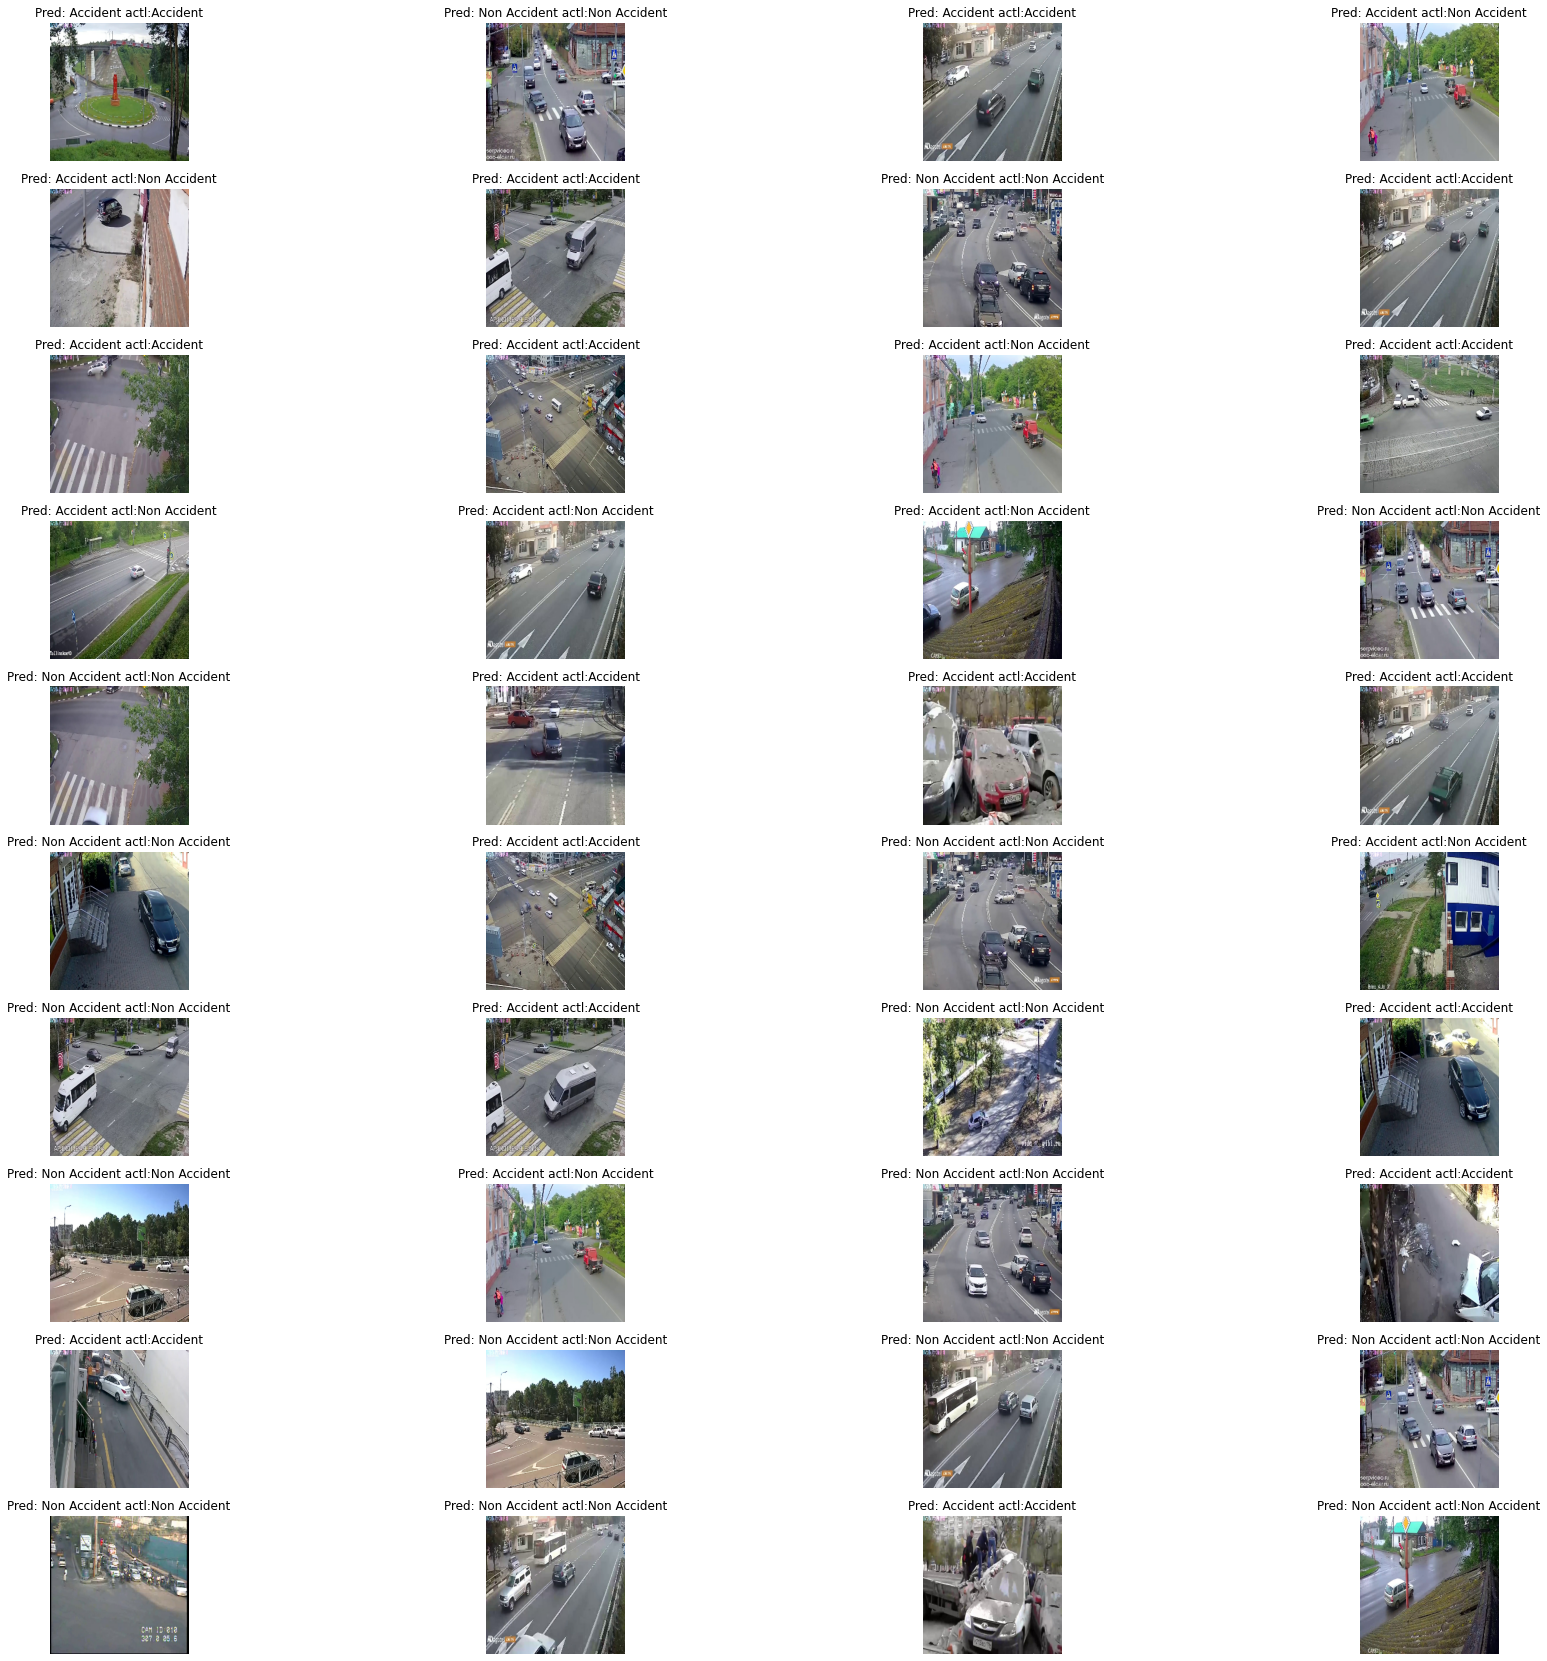

In [33]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [34]:
MyCnn.save('Model.h5')

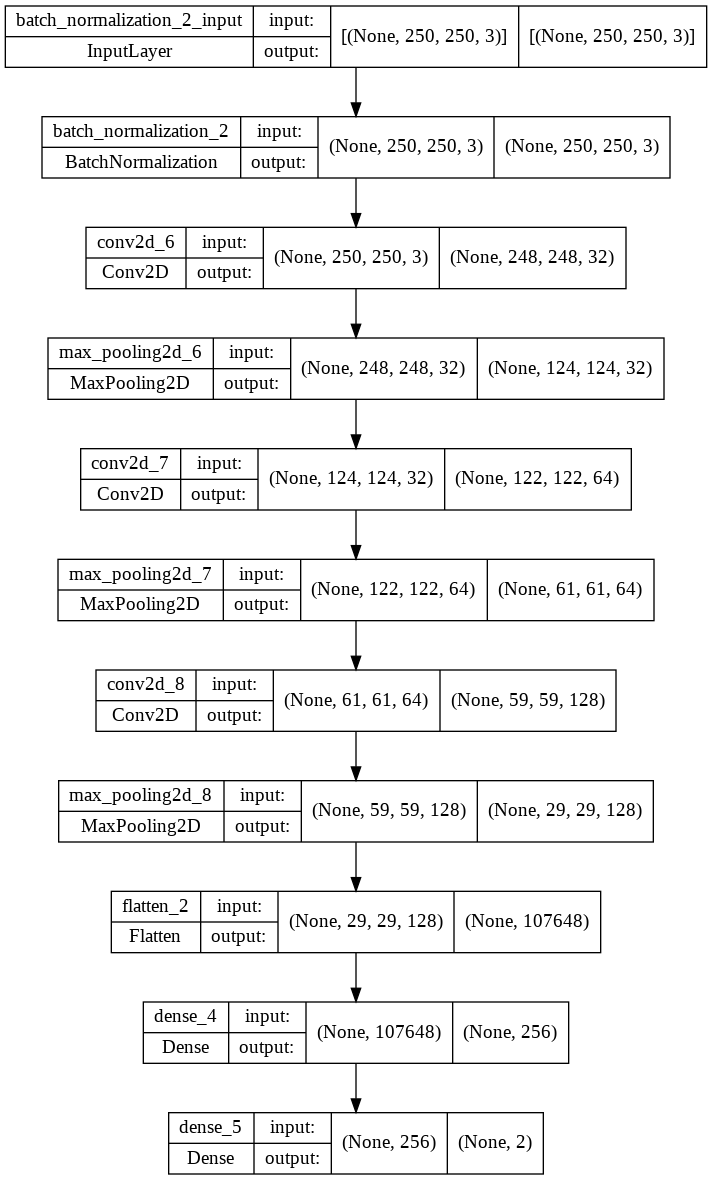

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)